# Linear Algebra-CEP
## ES304(A)

**Group Members**
Muhammad Farae (2020292)
Muhammad Umair (2020369)
Zaeem Shakir (2020487)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import xarray as xr
import rioxarray as rxr
import earthpy.plot as ep
from PIL import Image
import skimage.io as sk

### Part 1 - Image Importing and Manipulation

In [2]:
images_path = 'C://Users/Farae/Documents/GIKI Studies/Semester6/ES304-LinearAlgebra/CEP/myimages'

In [3]:
bands = [i for i in os.listdir(images_path) if i[-4:]=='.TIF']
bands.sort()
bands

['LE07_L1TP_151039_20201221_20210116_02_T1_B1.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B2.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B3.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B4.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B5.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B6.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B7.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B8.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B1.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B2.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B3.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B4.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B5.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B6_VCID_1.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B6_VCID_2.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B7.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_GM_B8.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_QA_PIXEL.TIF',
 'LE07_L1TP_15103

In [4]:
for i in range(len(bands)-8):
    bands.pop()
bands

['LE07_L1TP_151039_20201221_20210116_02_T1_B1.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B2.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B3.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B4.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B5.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B6.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B7.TIF',
 'LE07_L1TP_151039_20201221_20210116_02_T1_B8.TIF']

In [5]:
img = cv2.imread('myimages/'+str(bands[0]))
print(img.shape)

(7021, 8081, 3)


In [6]:
def convert_band(band_name):
    img = cv2.imread('myimages/'+str(band_name))
    #if band_name[-5] == '8':
    #    img = cv2.resize(img, (7021,8081,3), interpolation= cv2.INTER_AREA)
    return img

In [7]:
data = []
for i in bands:
    data.append(convert_band(i))
cdata = np.array(data, dtype=object)

In [8]:
for i in range(len(cdata)):
    print(cdata[i].shape)

(7021, 8081, 3)
(7021, 8081, 3)
(7021, 8081, 3)
(7021, 8081, 3)
(7021, 8081, 3)
(7021, 8081, 3)
(7021, 8081, 3)
(14041, 16161, 3)


In [9]:
#data[7] = cv2.resize(data[7], (8081, 7021))

In [10]:
# Truncate the Band 8 image due to the difference in dimensions
bands.pop()
cdata = cdata[:-1]

### Visualizaing the different bands

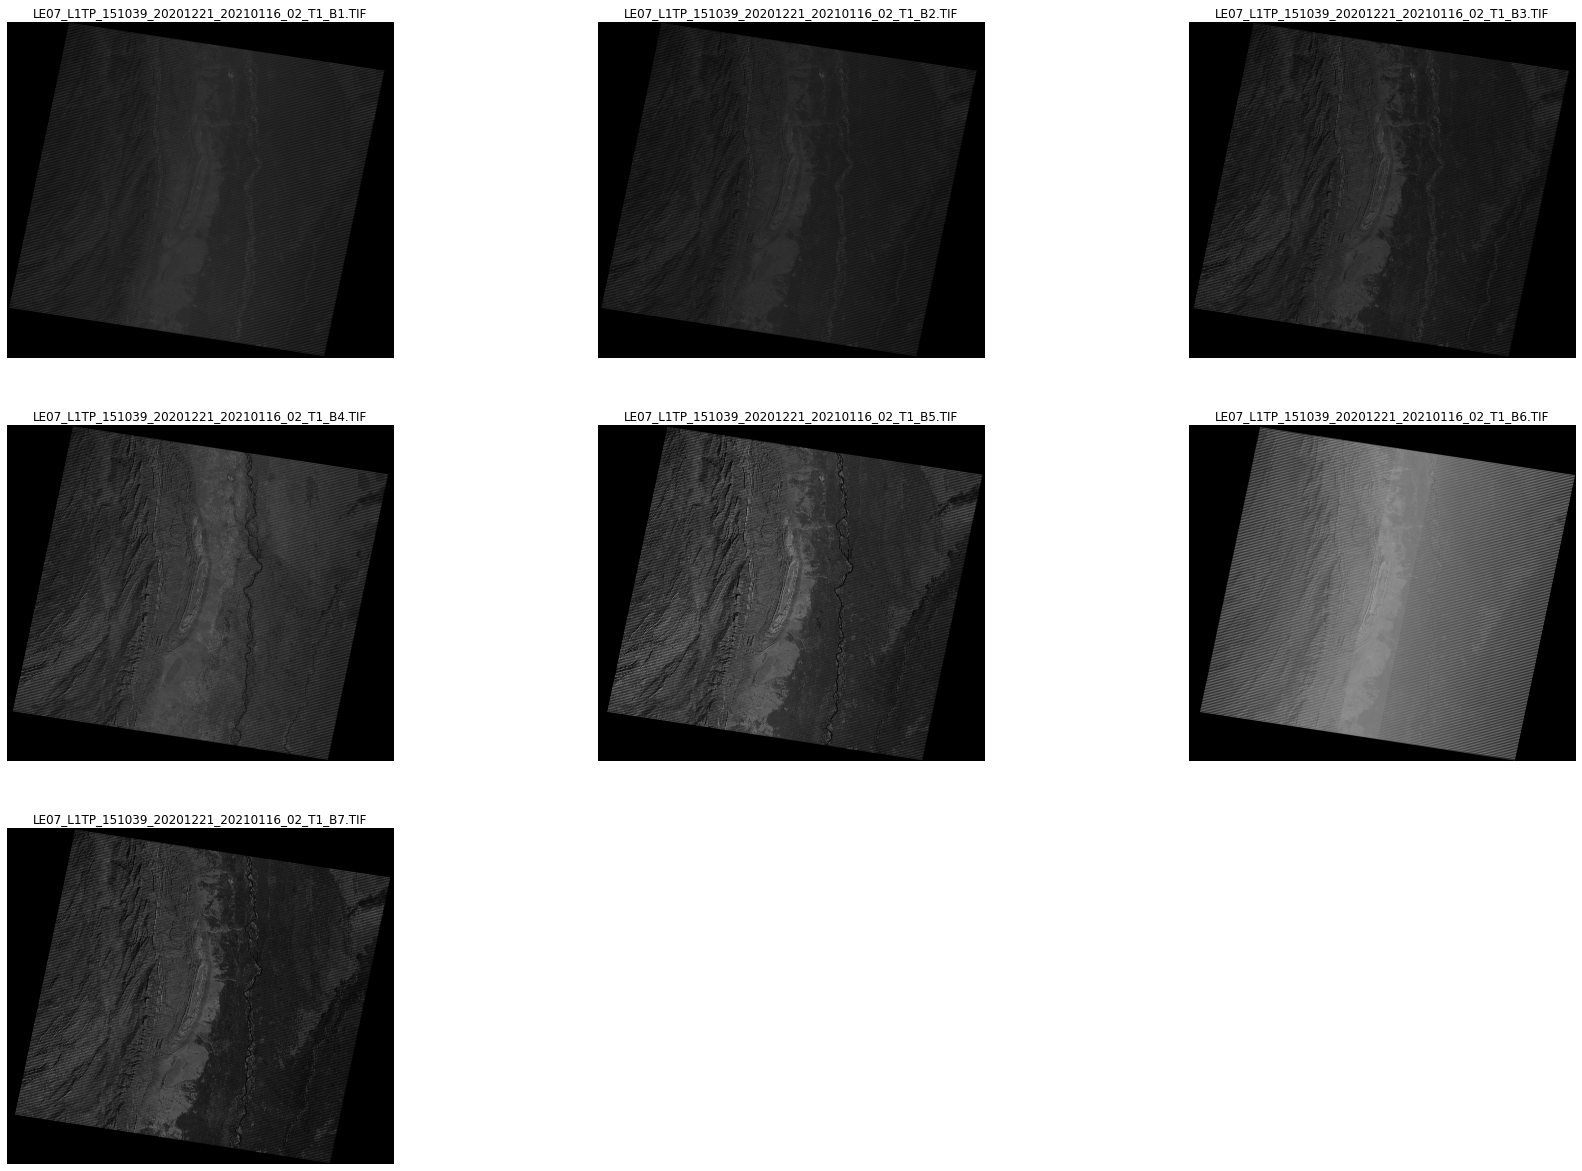

In [11]:
fig = plt.figure(figsize=(30, 21))
rows = 3
columns = 3
for i, aband in enumerate(cdata):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aband)
    plt.axis('off')
    plt.title(bands[i])

### Visualizing the combined bands as a single landsat image

In [12]:
def removeRGB(band_name):
    return rxr.open_rasterio('myimages/'+str(band_name)).squeeze()

In [13]:
arr = []
for i, myband in enumerate(bands):
    arr.append(removeRGB(myband))
    arr[i]['band'] = i+1

In [14]:
combined_image = xr.concat(arr, dim="bands")

In [15]:
combined_image

<xarray.DataArray (bands: 7, y: 7021, x: 8081)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
    band         (bands) int32 1 2 3 4 5 6 7
  * x            (x) float64 5.211e+05 5.211e+05 ... 7.635e+05 7.635e+05
  * y            (y) float64 3.461e+06 3.461e+06 ... 3.251e+06 3.25e+06
    spatial_ref  int32 0
Dimensions without coordinates: bands
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

<Figure size 7021x8081 with 0 Axes>

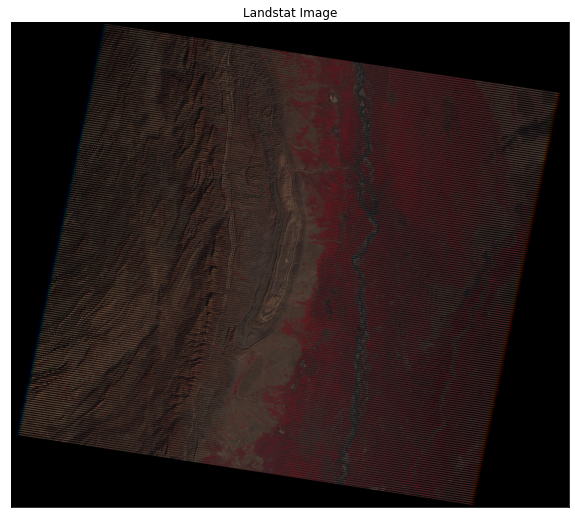

In [16]:
my_dpi=192
merged_image = plt.figure(figsize=(7021/my_dpi, 8081/my_dpi), dpi=my_dpi)
ax = ep.plot_rgb(combined_image.values,rgb=[3, 2, 1],title="Landstat Image")
plt.show()
plt.savefig("./my_img.tif")
plt.close()

### Exploring the cropping functionality of the images

In [17]:
test_image = Image.open(r"./myimages/LE07_L1TP_151039_20201221_20210116_02_T1_B1.TIF")
test_image.show()

In [18]:
w, h = test_image.size
left = 0
top = 0
right = w-1500
bottom = h-1500
cropped_image = test_image.crop((left, top, right, bottom))
cropped_image.show()

### Implementing Principal Component Analysis (PCA)

In [19]:
mypca = cv2.imread('./LE07_L1TP_151039_20201221_20210116_02_T1_refl.tif')

(7021, 8081, 3)

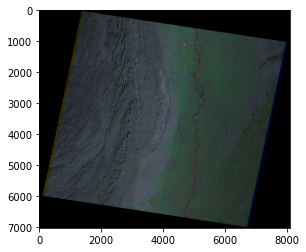

In [20]:
plt.imshow(mypca)
mypca.shape

In [21]:
mypca_im = Image.open(r'./LE07_L1TP_151039_20201221_20210116_02_T1_refl.tif')
mypca_im.getbands()

('R', 'G', 'B')

In [22]:
dim = (500, 500)
resized_mypca = cv2.resize(mypca, dim, interpolation= cv2.INTER_AREA)

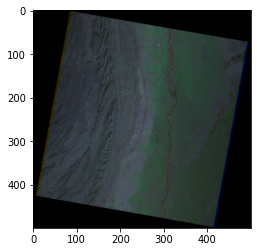

In [23]:
plt.imshow(resized_mypca)

In [24]:
b_ch, g_ch, r_ch = cv2.split(resized_mypca)

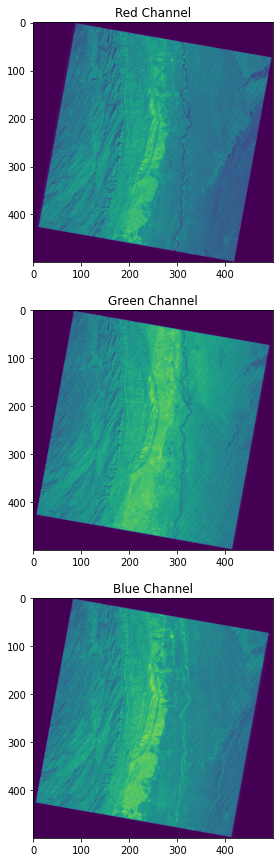

In [25]:
fig = plt.figure(figsize=(30,15))

fig.add_subplot(311)
plt.title("Red Channel")
plt.imshow(r_ch)

fig.add_subplot(312)
plt.title("Green Channel")
plt.imshow(g_ch)

fig.add_subplot(313)
plt.title("Blue Channel")
plt.imshow(b_ch)

#### Normalize the red, blue, and green color channels

In [26]:
std_r_ch = r_ch/255
std_g_ch = g_ch/255
std_b_ch = b_ch/255

In [27]:
np.std(r_ch)

33.62936252587825

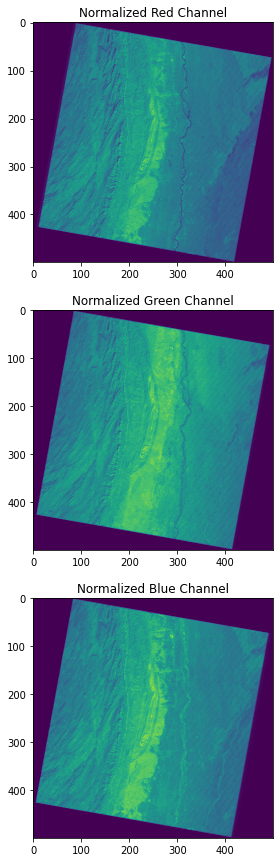

In [28]:
fig = plt.figure(figsize = (30, 15)) 

fig.add_subplot(311)
plt.title("Normalized Red Channel")
plt.imshow(std_r_ch)

fig.add_subplot(312)
plt.title("Normalized Green Channel")
plt.imshow(std_g_ch)

fig.add_subplot(313)
plt.title("Normalized Blue Channel")
plt.imshow(std_b_ch)
plt.show()

In [29]:
def pca_art(img, k):
    mean_data = (img - np.mean(img, axis = 0))
    cov = np.cov(mean_data.T)
    #cov = np.round(cov, 2)
    eig_val, eig_vec = np.linalg.eig(cov)
    indices = np.arange(0, len(eig_val), 1)
    indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]

    sorted_eig_vec = eig_vec[:,:k]

    pca_data = np.dot(mean_data, sorted_eig_vec)
    recon_img = (np.dot(pca_data, sorted_eig_vec.T)+np.mean(img, axis=0))
    loss = np.mean(np.square(recon_img - img))
    return recon_img, loss

In [30]:
test_r, l = pca_art(r_ch, 50)
test_r.shape

(500, 500)

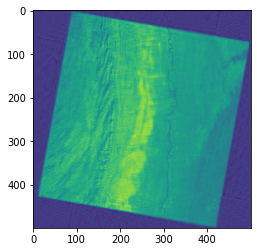

In [31]:

#original_aspect_ratio = test_r.shape[1] / test_r.shape[0]
#stretch_factor = 1
#new_aspect_ratio = original_aspect_ratio * stretch_factor
plt.imshow(test_r)#, aspect=new_aspect_ratio)

### Applying PCA On the Red, Green and Blue Spectral Channels and Merging Them Together

In [32]:
r_pca, loss_r = pca_art(std_r_ch, 75)
g_pca, loss_g = pca_art(std_g_ch, 75)
b_pca, loss_b = pca_art(std_b_ch, 75)

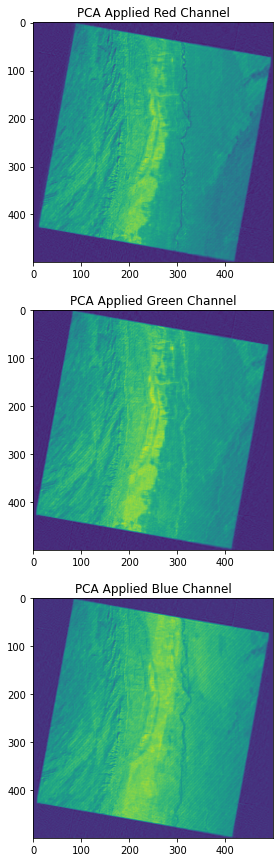

In [33]:
fig = plt.figure(figsize = (30, 15)) 

fig.add_subplot(311)
plt.title("PCA Applied Red Channel")
plt.imshow(r_pca)

fig.add_subplot(312)
plt.title("PCA Applied Green Channel")
plt.imshow(b_pca)

fig.add_subplot(313)
plt.title("PCA Applied Blue Channel")
plt.imshow(g_pca)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


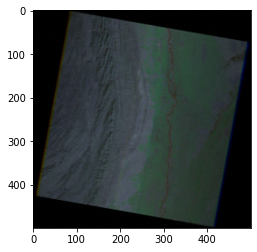

In [34]:
merged_pca_img = (cv2.merge((b_pca, g_pca, r_pca)))
plt.imshow(merged_pca_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


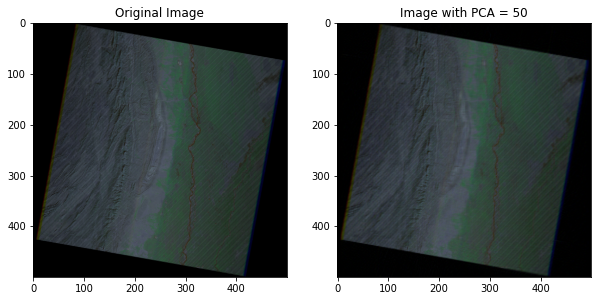

In [35]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(resized_mypca)
fig.add_subplot(122)
plt.title("Image with PCA = 50")
plt.imshow(merged_pca_img)
plt.show()

### Applying PCA at different components

In [36]:
# opening all the band image saving them into one list
pca_images = []
i = 0
for i in range(0,225,25):
    r_pca, l_r = pca_art(std_r_ch, i)
    b_pca, l_b = pca_art(std_b_ch, i)
    g_pca, l_g = pca_art(std_g_ch, i)
    merged_pca_img = (cv2.merge((b_pca, g_pca, r_pca)))
    pca_images.append(merged_pca_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


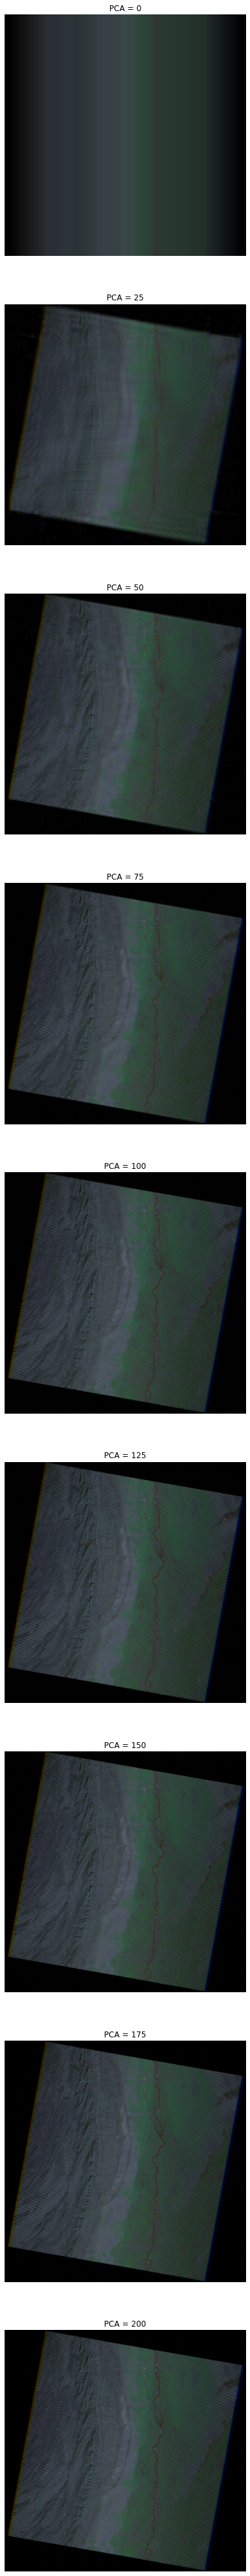

In [37]:
fig = plt.figure(figsize=(120, 80))
rows = 10
columns = 1
j = 0
for i, aband in enumerate(pca_images):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(aband)
    plt.axis('off')
    plt.title('PCA = ' + str(j))
    j+=25

## Error Analysis

In [38]:
t_r, l1 = pca_art(std_r_ch, 500)
t_b, l1 = pca_art(std_b_ch, 500)
t_g, l1 = pca_art(std_g_ch, 500)

In [39]:
def mse(img1, img2):
    err = np.square(np.subtract(img1,img2)).mean()
    return err

In [40]:
err = mse(t_r, std_r_ch)
err

2.0137377177668322e-26

In [41]:
for j in range(0, 201, 25):
    r_pca,l1 = pca_art(std_r_ch, j)
    b_pca,l1 = pca_art(std_b_ch, j)
    g_pca,l1 = pca_art(std_g_ch, j)
    err_r = mse(r_pca, std_r_ch)
    err_b = mse(b_pca, std_b_ch)
    err_g = mse(g_pca, std_g_ch)
    print("For PCA Value of " + str(j))
    print("Error for Red Channel: " + str(err_r))
    print("Error for Blue Channel: " + str(err_r))
    print("Error for Green Channel: " + str(err_r))
    print("\n\n")

For PCA Value of 0
Error for Red Channel: 0.011173673373748557
Error for Blue Channel: 0.011173673373748557
Error for Green Channel: 0.011173673373748557



For PCA Value of 25
Error for Red Channel: 0.0008158496513114649
Error for Blue Channel: 0.0008158496513114649
Error for Green Channel: 0.0008158496513114649



For PCA Value of 50
Error for Red Channel: 0.00045961763940376296
Error for Blue Channel: 0.00045961763940376296
Error for Green Channel: 0.00045961763940376296



For PCA Value of 75
Error for Red Channel: 0.0003037442958598006
Error for Blue Channel: 0.0003037442958598006
Error for Green Channel: 0.0003037442958598006



For PCA Value of 100
Error for Red Channel: 0.00021160378915043148
Error for Blue Channel: 0.00021160378915043148
Error for Green Channel: 0.00021160378915043148



For PCA Value of 125
Error for Red Channel: 0.0001503202051019376
Error for Blue Channel: 0.0001503202051019376
Error for Green Channel: 0.0001503202051019376



For PCA Value of 150
Error for